## Implement the Continuous Bag of Words (CBOW) Model. Stages can be:
a. Data preparation<br>
b. Generate training data<br>
c. Train model<br>
d. Output<br>

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
data = """Reinforcement learning (RL) is a type of machine learning where agents learn optimal behavior by interacting with an environment to maximize cumulative rewards. RL techniques range from value-based methods, such as Q-learning, to policy-based methods, such as policy gradients, and include actor-critic algorithms that combine both approaches. Reinforcement learning has found applications in diverse areas, including robotics, autonomous vehicles, game AI, finance, healthcare, and industrial automation. By training agents to make sequential decisions under uncertainty, RL systems have achieved remarkable results, often surpassing traditional methods and even human expertise in complex environments."""
data

'Reinforcement learning (RL) is a type of machine learning where agents learn optimal behavior by interacting with an environment to maximize cumulative rewards. RL techniques range from value-based methods, such as Q-learning, to policy-based methods, such as policy gradients, and include actor-critic algorithms that combine both approaches. Reinforcement learning has found applications in diverse areas, including robotics, autonomous vehicles, game AI, finance, healthcare, and industrial automation. By training agents to make sequential decisions under uncertainty, RL systems have achieved remarkable results, often surpassing traditional methods and even human expertise in complex environments.'

In [3]:
#Data preparation
sentences = data.split('.')
sentences

['Reinforcement learning (RL) is a type of machine learning where agents learn optimal behavior by interacting with an environment to maximize cumulative rewards',
 ' RL techniques range from value-based methods, such as Q-learning, to policy-based methods, such as policy gradients, and include actor-critic algorithms that combine both approaches',
 ' Reinforcement learning has found applications in diverse areas, including robotics, autonomous vehicles, game AI, finance, healthcare, and industrial automation',
 ' By training agents to make sequential decisions under uncertainty, RL systems have achieved remarkable results, often surpassing traditional methods and even human expertise in complex environments',
 '']

In [4]:
clean_sent=[]
for sentence in sentences:
    if sentence=="":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()#remove the single word in a sentence
    sentence = sentence.lower()
    clean_sent.append(sentence)

clean_sent

['reinforcement learning rl is a type of machine learning where agents learn optimal behavior by interacting with an environment to maximize cumulative rewards',
 'rl techniques range from value based methods such as q learning to policy based methods such as policy gradients and include actor critic algorithms that combine both approaches',
 'reinforcement learning has found applications in diverse areas including robotics autonomous vehicles game ai finance healthcare and industrial automation',
 'by training agents to make sequential decisions under uncertainty rl systems have achieved remarkable results often surpassing traditional methods and even human expertise in complex environments']

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [6]:
#Generate training data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)

[[6, 1, 2, 14, 15, 16, 17, 18, 1, 19, 7, 20, 21, 22, 8, 23, 24, 25, 26, 3, 27, 28, 29], [2, 30, 31, 32, 33, 9, 4, 10, 11, 34, 1, 3, 12, 9, 4, 10, 11, 12, 35, 5, 36, 37, 38, 39, 40, 41, 42, 43], [6, 1, 44, 45, 46, 13, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 5, 57, 58], [8, 59, 7, 3, 60, 61, 62, 63, 64, 2, 65, 66, 67, 68, 69, 70, 71, 72, 4, 5, 73, 74, 75, 13, 76, 77]]


In [7]:
index_to_word = {}
word_to_index = {}

for i, sequence in enumerate(sequences):
#     print(sequence)
    word_in_sentence = clean_sent[i].split()
#     print(word_in_sentence)
    
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

print(index_to_word, "\n")
print(word_to_index)

{6: 'reinforcement', 1: 'learning', 2: 'rl', 14: 'is', 15: 'a', 16: 'type', 17: 'of', 18: 'machine', 19: 'where', 7: 'agents', 20: 'learn', 21: 'optimal', 22: 'behavior', 8: 'by', 23: 'interacting', 24: 'with', 25: 'an', 26: 'environment', 3: 'to', 27: 'maximize', 28: 'cumulative', 29: 'rewards', 30: 'techniques', 31: 'range', 32: 'from', 33: 'value', 9: 'based', 4: 'methods', 10: 'such', 11: 'as', 34: 'q', 12: 'policy', 35: 'gradients', 5: 'and', 36: 'include', 37: 'actor', 38: 'critic', 39: 'algorithms', 40: 'that', 41: 'combine', 42: 'both', 43: 'approaches', 44: 'has', 45: 'found', 46: 'applications', 13: 'in', 47: 'diverse', 48: 'areas', 49: 'including', 50: 'robotics', 51: 'autonomous', 52: 'vehicles', 53: 'game', 54: 'ai', 55: 'finance', 56: 'healthcare', 57: 'industrial', 58: 'automation', 59: 'training', 60: 'make', 61: 'sequential', 62: 'decisions', 63: 'under', 64: 'uncertainty', 65: 'systems', 66: 'have', 67: 'achieved', 68: 'remarkable', 69: 'results', 70: 'often', 71: 'su

In [8]:
vocab_size = len(tokenizer.word_index) + 1 #vocabulary (number of unique words)
emb_size = 10 #vector size
context_size = 2#means two words on the left and two words on the right 

contexts = []
targets = []

for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i] #center word
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]
#         print(context)
        contexts.append(context)
        targets.append(target)
print(contexts, "\n")
print(targets)

[[6, 1, 14, 15], [1, 2, 15, 16], [2, 14, 16, 17], [14, 15, 17, 18], [15, 16, 18, 1], [16, 17, 1, 19], [17, 18, 19, 7], [18, 1, 7, 20], [1, 19, 20, 21], [19, 7, 21, 22], [7, 20, 22, 8], [20, 21, 8, 23], [21, 22, 23, 24], [22, 8, 24, 25], [8, 23, 25, 26], [23, 24, 26, 3], [24, 25, 3, 27], [25, 26, 27, 28], [26, 3, 28, 29], [2, 30, 32, 33], [30, 31, 33, 9], [31, 32, 9, 4], [32, 33, 4, 10], [33, 9, 10, 11], [9, 4, 11, 34], [4, 10, 34, 1], [10, 11, 1, 3], [11, 34, 3, 12], [34, 1, 12, 9], [1, 3, 9, 4], [3, 12, 4, 10], [12, 9, 10, 11], [9, 4, 11, 12], [4, 10, 12, 35], [10, 11, 35, 5], [11, 12, 5, 36], [12, 35, 36, 37], [35, 5, 37, 38], [5, 36, 38, 39], [36, 37, 39, 40], [37, 38, 40, 41], [38, 39, 41, 42], [39, 40, 42, 43], [6, 1, 45, 46], [1, 44, 46, 13], [44, 45, 13, 47], [45, 46, 47, 48], [46, 13, 48, 49], [13, 47, 49, 50], [47, 48, 50, 51], [48, 49, 51, 52], [49, 50, 52, 53], [50, 51, 53, 54], [51, 52, 54, 55], [52, 53, 55, 56], [53, 54, 56, 5], [54, 55, 5, 57], [55, 56, 57, 58], [8, 59, 3

In [9]:
#printing features with target
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," -> ", target)

['reinforcement', 'learning', 'is', 'a']  ->  rl
['learning', 'rl', 'a', 'type']  ->  is
['rl', 'is', 'type', 'of']  ->  a
['is', 'a', 'of', 'machine']  ->  type
['a', 'type', 'machine', 'learning']  ->  of


In [10]:
# Convert the contexts and targets to numpy arrays
X = np.array(contexts) 
Y = np.array(targets)

In [11]:
# print(X)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda 

In [13]:
#Train model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2*context_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
])


C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X, Y, epochs=80)

Epoch 1/80

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.0281 - loss: 4.3576
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0266 - loss: 4.3517   
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0383 - loss: 4.3461
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0445 - loss: 4.3393 
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0523 - loss: 4.3290 
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0344 - loss: 4.3164
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0445 - loss: 4.3001
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0445 - loss: 4.2707 
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0445 - loss: 4.2455
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0383 - loss: 4.2091 
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0484 - loss: 4.1460
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0625 - loss: 4.0898 
Epo

<Axes: >

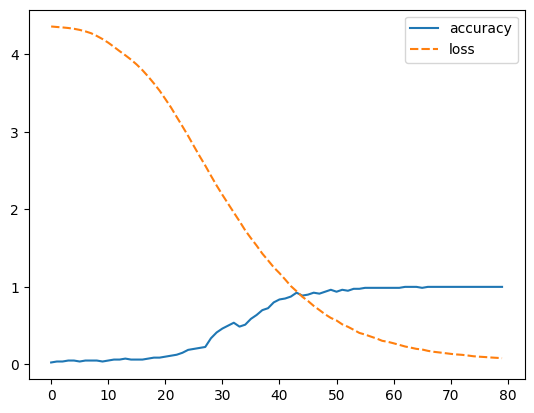

In [16]:
import seaborn as sns
sns.lineplot(model.history.history)

In [17]:
from sklearn.decomposition import PCA # PCA (Principal Component Analysis) 

embeddings = model.get_weights()[0]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

In [22]:
print("'Reinforcement learning (RL) is a type of machine learning where agents learn optimal behavior by interacting with an environment to maximize cumulative rewards. RL techniques range from value-based methods, such as Q-learning, to policy-based methods, such as policy gradients, and include actor-critic algorithms that combine both approaches. Reinforcement learning has found applications in diverse areas, including robotics, autonomous vehicles, game AI, finance, healthcare, and industrial automation. By training agents to make sequential decisions under uncertainty, RL systems have achieved remarkable results, often surpassing traditional methods and even human expertise in complex environments.")

'Reinforcement learning (RL) is a type of machine learning where agents learn optimal behavior by interacting with an environment to maximize cumulative rewards. RL techniques range from value-based methods, such as Q-learning, to policy-based methods, such as policy gradients, and include actor-critic algorithms that combine both approaches. Reinforcement learning has found applications in diverse areas, including robotics, autonomous vehicles, game AI, finance, healthcare, and industrial automation. By training agents to make sequential decisions under uncertainty, RL systems have achieved remarkable results, often surpassing traditional methods and even human expertise in complex environments.


In [23]:
# test model: select some sentences from above paragraph
test_sentenses = [
    "known as structured learning",
    "transformers have applied to",
    "where they produced results",
    "cases surpassing expert performance"
]

In [27]:
#OUTPUT
for sent in test_sentenses:
    test_words = sent.split(" ")
    x_test = []
    
    # Convert words to indices, skipping any words not found in word_to_index
    for word in test_words:
        index = word_to_index.get(word)
        if index is not None:
            x_test.append(index)
    
    # Ensure x_test has valid values and is not empty
    if x_test:
        x_test = np.array([x_test], dtype=np.float32)  # Add batch dimension and ensure correct dtype
        
        # Run the prediction
        pred = model.predict(x_test)
        pred_index = np.argmax(pred[0])
        
        # Print the result
        print("Prediction for", test_words, "=", index_to_word.get(pred_index), "\n")
    else:
        print(f"Warning: No valid words in sentence '{sent}' found in word_to_index.\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Prediction for ['known', 'as', 'structured', 'learning'] = agents 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction for ['transformers', 'have', 'applied', 'to'] = uncertainty 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction for ['where', 'they', 'produced', 'results'] = from 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Prediction for ['cases', 'surpassing', 'expert', 'performance'] = often 



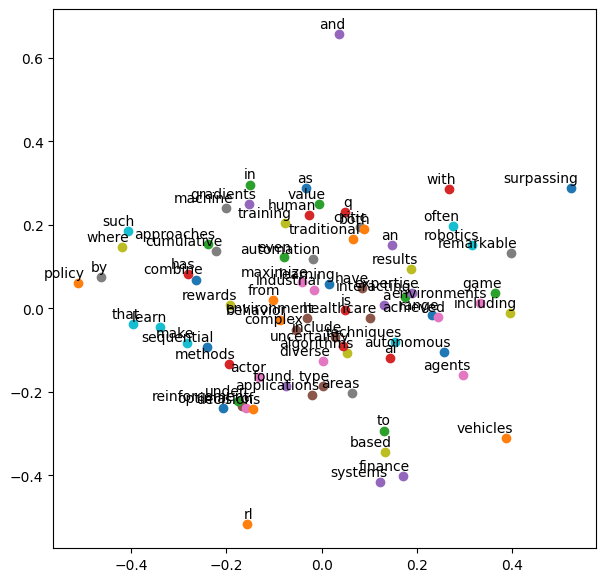

In [26]:
# Visualize the embeddings
plt.figure(figsize=(7, 7))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()